In [4]:
from sklearn.datasets import fetch_mldata
from q1 import HopfieldNetwork
import numpy as np
import random
import matplotlib.pyplot as plt

mnist = fetch_mldata('MNIST original', data_home='.cache')
targets = mnist.target.tolist()

ones = mnist.data[targets.index(1):targets.index(2)]
ones = [[1 if p > 0 else -1 for p in v] for v in ones]
ones = [(x, 1) for x in ones]

fives = mnist.data[targets.index(5):targets.index(6)]
fives = [[1 if p > 0 else -1 for p in v] for v in fives]
fives = [(x, 5) for x in fives]

dataset = ones + fives

random.shuffle(dataset)

In [5]:
hf_storkey = HopfieldNetwork(
    train_dataset=dataset[:2000],
    mode='storkey'
)

In [6]:
hf_hebbian = HopfieldNetwork(
    train_dataset=dataset[:20],
    mode='hebbian'
)

In [40]:
from scipy.misc import imrotate

THRESHOLD = 30

def add_noise(vector, ratio=0.2):
    indices = range(len(vector))
    num = ratio * len(indices)
    for i in range(int(num)):
        c = random.choice(indices)
        vector[c] = 1 if vector[c] == -1 else -1
        
def show(img, title='', suptitle=''):
    plt.imshow(img)
    plt.title(title)
    plt.suptitle(suptitle)
    plt.show()


def test(network, index, item, sup):
    print 'Example %s' % index
    image = np.array(item[0]).reshape(28, 28)
    result = np.array(network.activate(item[0])).reshape(28, 28)
    
    attempts = [result, imrotate(result, angle=30.), imrotate(result, angle=-30.)]

    best_attempt = float('inf')
    
    for r in attempts:
        for attempt in [r, np.invert(r)]:
            attempt_norm = np.linalg.norm(image - attempt)
            if attempt_norm < best_attempt:
                best_attempt = attempt_norm
        
    print 'Best attempt', best_attempt
    
    show(image, "Input - Example %s" % index, sup)
    show(result, "Output - Example %s" % index, sup)
    
    return best_attempt


Example 0
Best attempt 38.8844441904


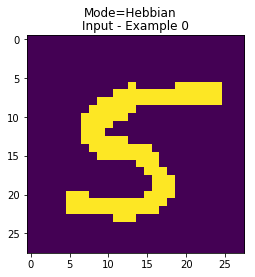

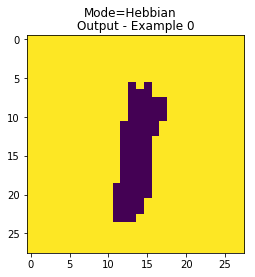

Example 1
Best attempt 37.5233260786


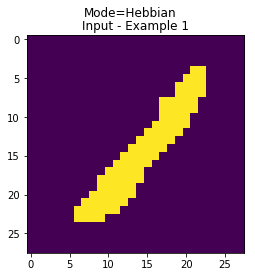

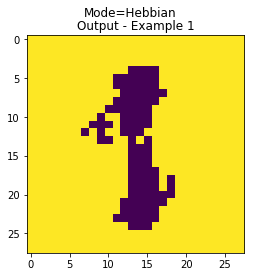

Example 2
Best attempt 5.29150262213


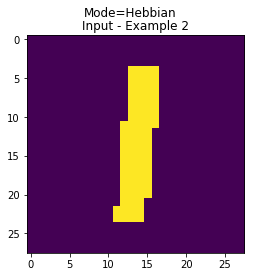

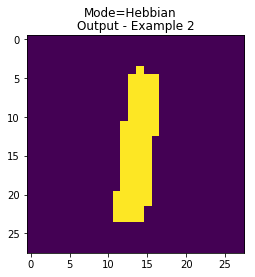

Example 3
Best attempt 35.4400902933


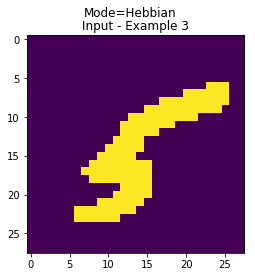

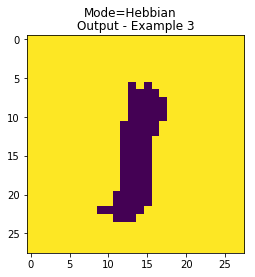

Example 4
Best attempt 9.59166304663


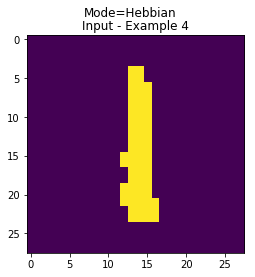

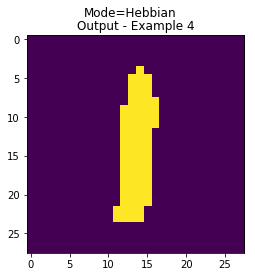

Example 5
Best attempt 37.7359245282


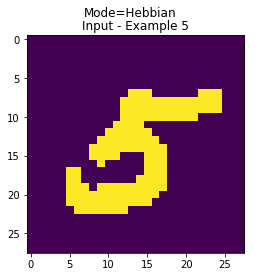

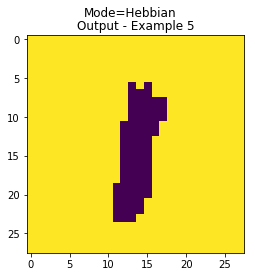

Example 6
Best attempt 6.63324958071


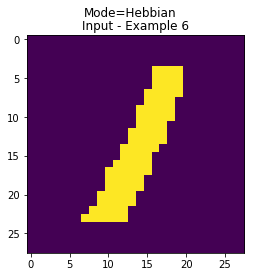

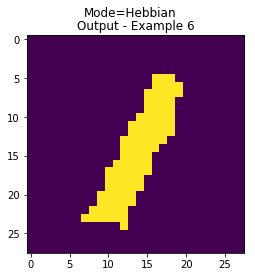

Example 7
Best attempt 5.65685424949


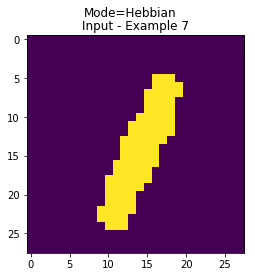

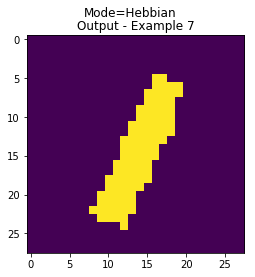

Example 8
Best attempt 10.1980390272


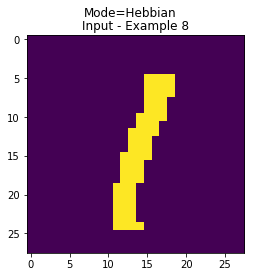

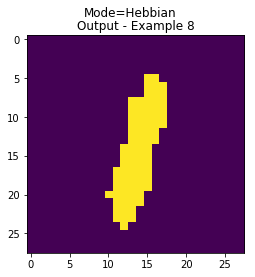

Example 9
Best attempt 7.21110255093


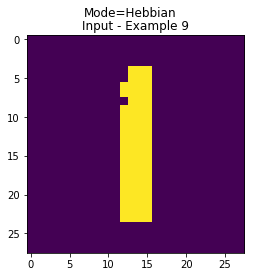

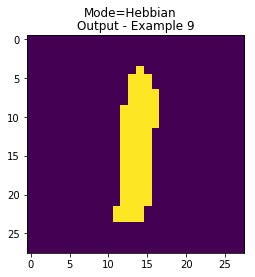

Example 10
Best attempt 7.74596669241


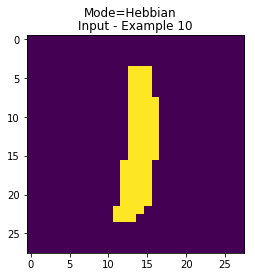

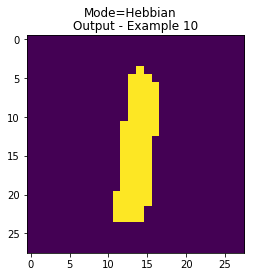

Example 11
Best attempt 37.094473982


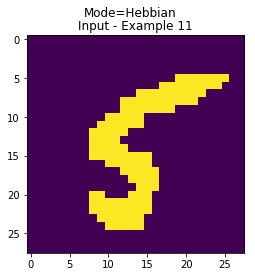

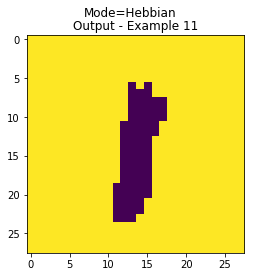

Example 12
Best attempt 38.6781592116


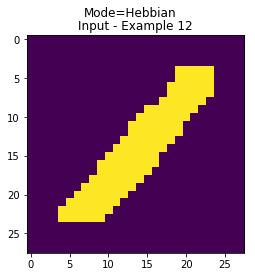

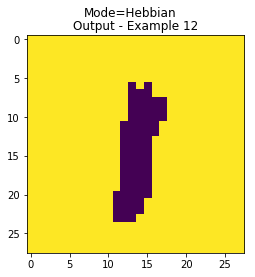

Example 13
Best attempt 8.24621125124


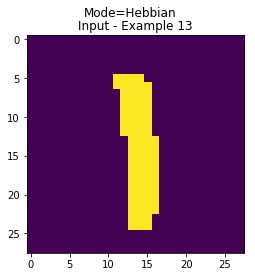

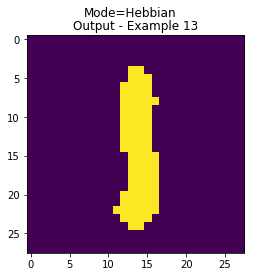

Example 14
Best attempt 8.48528137424


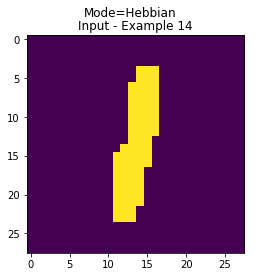

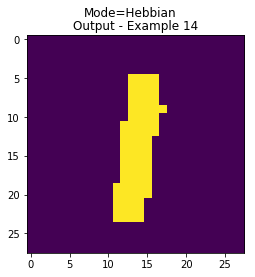

Example 15
Best attempt 42.0475920833


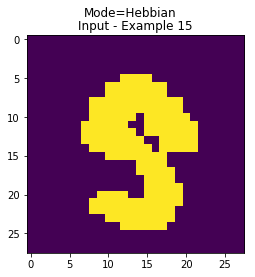

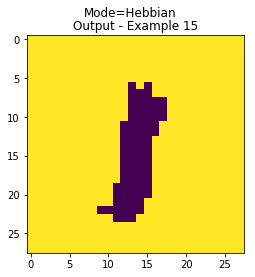

Example 16
Best attempt 6.92820323028


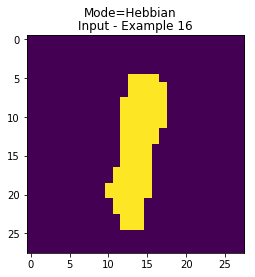

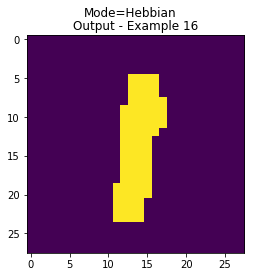

Example 17
Best attempt 41.8568990729


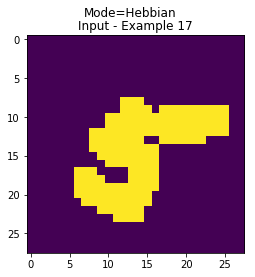

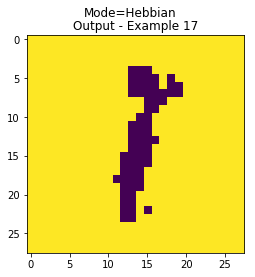

Example 18
Best attempt 43.4511219648


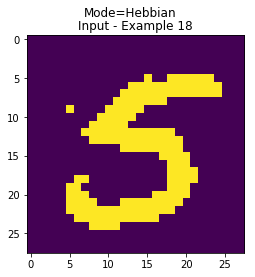

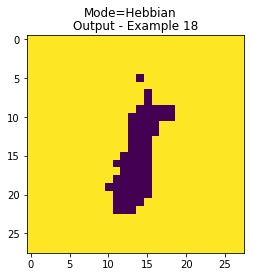

Example 19
Best attempt 33.4664010614


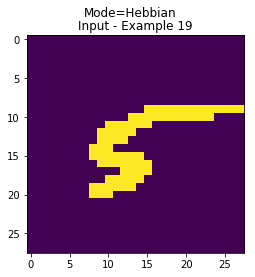

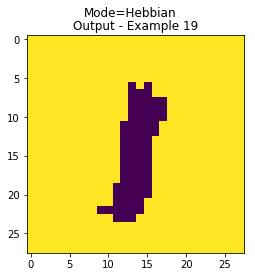

Accuracy of the system with hebbian: 0.5


In [41]:
hebb_acc = 0.
num_items = 20
for index, image in enumerate(dataset[:num_items]):
    norm = test(hf_hebbian, index, image, "Mode=Hebbian")
    if norm <= THRESHOLD:
        hebb_acc += 1

print "Accuracy of the system with hebbian:", (hebb_acc / num_items) 

Example 0
Best attempt 28.0


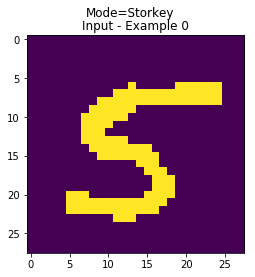

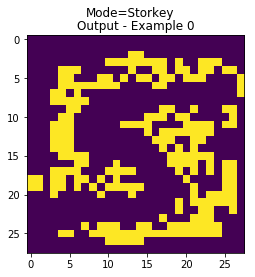

Example 1
Best attempt 18.4390889146


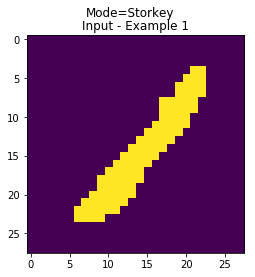

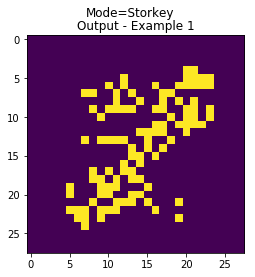

Example 2
Best attempt 28.0


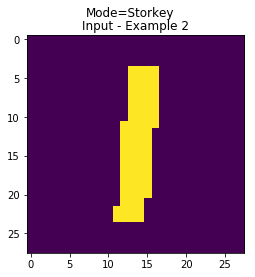

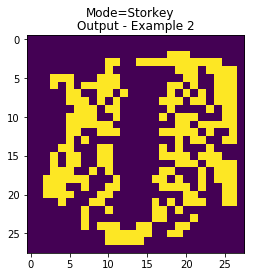

Example 3
Best attempt 28.2842712475


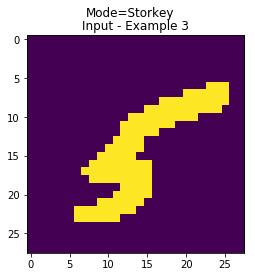

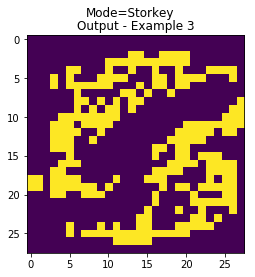

Example 4
Best attempt 28.0


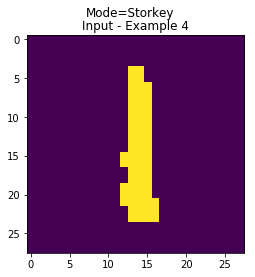

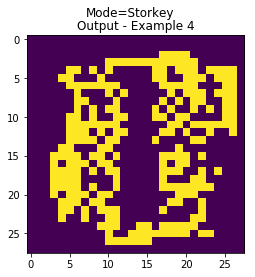

Example 5
Best attempt 28.0


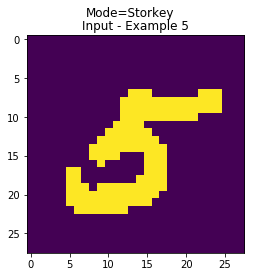

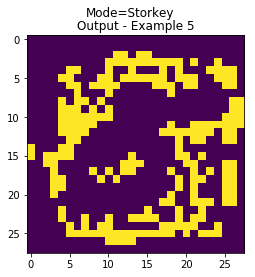

Example 6
Best attempt 28.1424945589


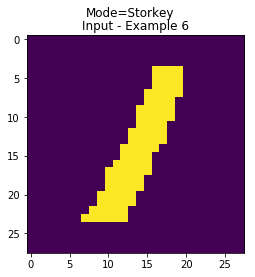

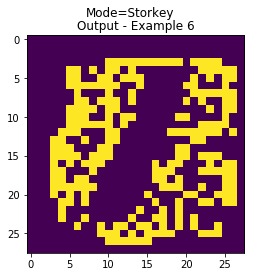

Example 7
Best attempt 28.0


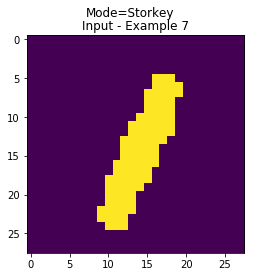

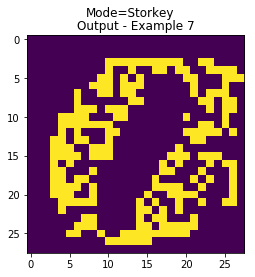

Example 8
Best attempt 28.0


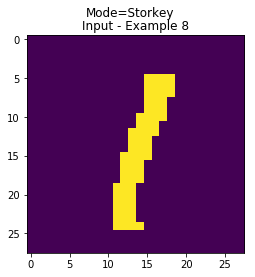

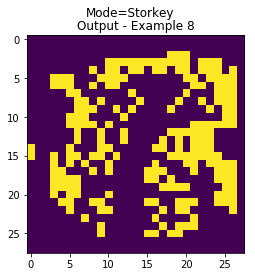

Example 9
Best attempt 11.8321595662


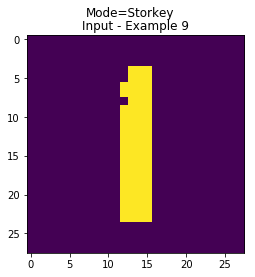

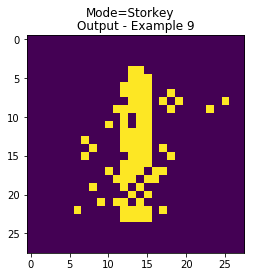

Example 10
Best attempt 11.1355287257


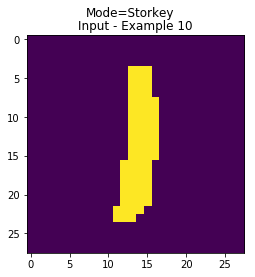

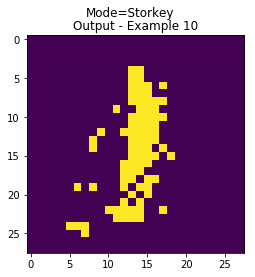

Example 11
Best attempt 28.0


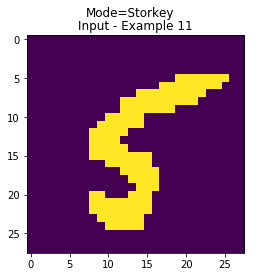

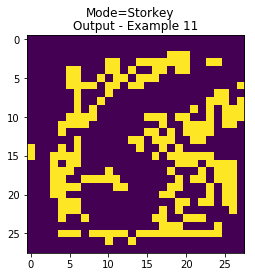

Example 12
Best attempt 28.0


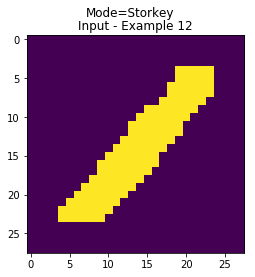

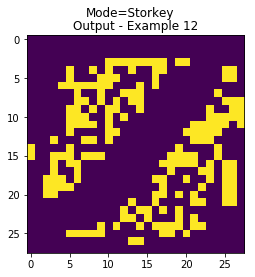

Example 13
Best attempt 28.0


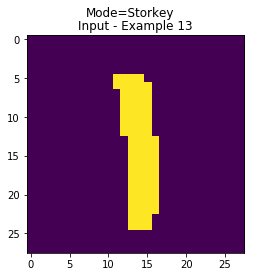

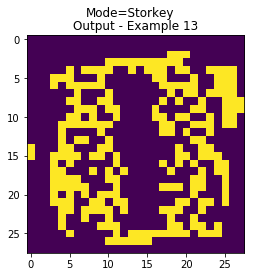

Example 14
Best attempt 12.1655250606


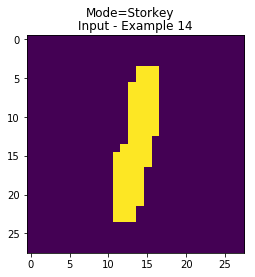

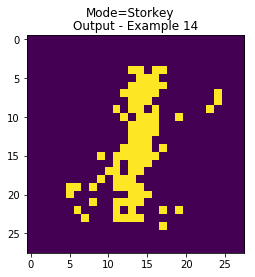

Example 15
Best attempt 17.88854382


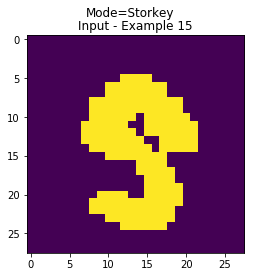

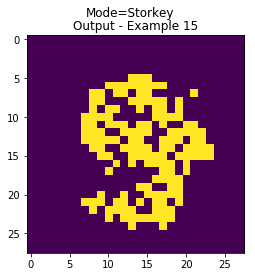

Example 16
Best attempt 12.1655250606


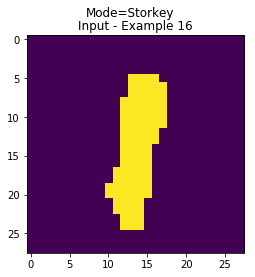

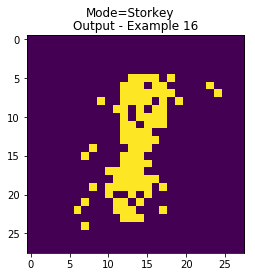

Example 17
Best attempt 28.0


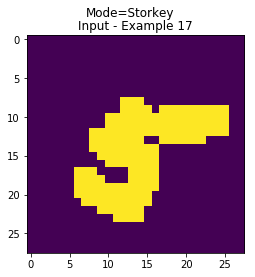

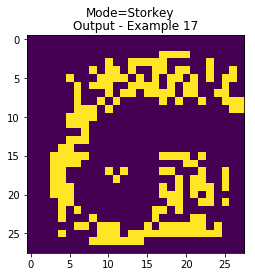

Example 18
Best attempt 28.0


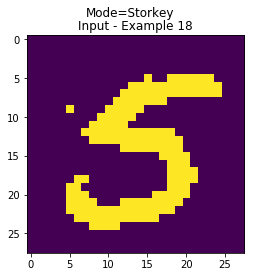

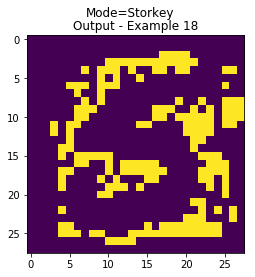

Example 19
Best attempt 11.1355287257


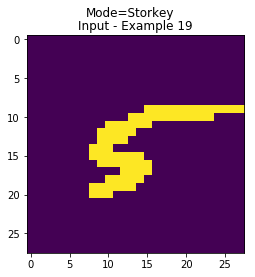

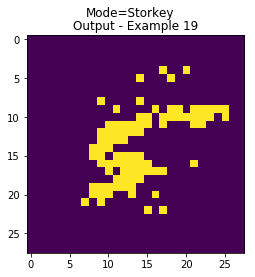

Accuracy of the system with storkey: 1.0


In [43]:
sto_acc = 0.
num_items = 20
for index, image in enumerate(dataset[:num_items]):
    norm = test(hf_storkey, index, image, "Mode=Storkey")
    if norm <= THRESHOLD:
        sto_acc += 1
print "Accuracy of the system with storkey:", (sto_acc / num_items)      